# Implementação da arquitetura AlexNet no dataset MNIST


In [21]:
# Importação de bibliotecas
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras import datasets, layers, models, losses
import numpy as np
import os
import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
print(tf.__version__)

2.15.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
def vetorizar_imagens_talhao(caminho, label):
    lista_imagens = []
    labels = []
    for pasta_imagem_grande in os.listdir(caminho):
        caminho_pasta_imagem_grande = os.path.join(caminho, pasta_imagem_grande)
        for pasta_imagem_cortada in os.listdir(caminho_pasta_imagem_grande):
            caminho_pasta_imagem_cortada = os.path.join(caminho_pasta_imagem_grande, pasta_imagem_cortada)
            caminho_imagem = os.path.join(caminho_pasta_imagem_cortada, os.listdir(caminho_pasta_imagem_cortada)[1])
            img = cv2.imread(caminho_imagem)
            lista_imagens.append(img)
            labels.append(label)

    return np.array(lista_imagens), np.array(labels)

In [31]:
import os
import cv2
import numpy as np
def vetorizar_imagem(caminho_desmatamento, label):
    lista_imagens = []
    labels = []
    for nome_imagem in os.listdir(caminho_desmatamento):
        caminho_imagem = os.path.join(caminho_desmatamento, nome_imagem)
        img = cv2.imread(caminho_imagem)
        if img is not None:  # Verifica se a imagem foi carregada corretamente
            img = cv2.resize(img, (200, 200))  # Redimensiona a imagem para ter certeza que todas têm o mesmo tamanho
            lista_imagens.append(img)
            labels.append(label)
        else:
            print(f"Erro ao carregar a imagem: {caminho_imagem}")  # Informa se houver erro ao carregar alguma imagem
    return np.array(lista_imagens), np.array(labels)

In [32]:
# Com talhão
caminho_com_talhao = '/content/drive/MyDrive/imagens_com_talhao'
imagens_com_talhao, labels_com_talhao = vetorizar_imagem(caminho_com_talhao, 1)
print(imagens_com_talhao.shape)

Erro ao carregar a imagem: /content/drive/MyDrive/imagens_com_talhao/.DS_Store
(66, 200, 200, 3)


In [33]:
# Sem talhão
caminho_sem_talhao = '/content/drive/MyDrive/imagens_sem_talhao'
imagens_sem_talhao, labels_sem_talhao = vetorizar_imagem(caminho_sem_talhao, 0)
print(imagens_sem_talhao.shape)

(56, 200, 200, 3)


In [34]:
combined_images = np.concatenate((imagens_com_talhao, imagens_sem_talhao), axis=0)
combined_labels = np.concatenate((labels_com_talhao, labels_sem_talhao), axis=0)

combined_images = combined_images / 255.0

print("Shape of the combined array:", combined_images.shape)

Shape of the combined array: (122, 200, 200, 3)


In [35]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
(trainX, testX, trainY, testY) = train_test_split(combined_images, combined_labels)

# O código abaixo converterá os rótulos em vetores one-hot encoding
trainY = to_categorical(trainY, 2)
testY = to_categorical(testY, 2)
print(testY)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [36]:
# Criação da arquitetura da CNN seguindo a estrutura do AlexNet

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(96, (11, 11), strides=(4,4), padding="valid", activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D((3, 3), strides=2),
    tf.keras.layers.Conv2D(256, (5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D((3, 3), strides=2),
    tf.keras.layers.Conv2D(384, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(384, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((3, 3), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Relatório da arquitetura da rede neural
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 48, 48, 96)        34944     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 23, 23, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 19, 19, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 9, 9, 256)         0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 384)         885120    
                                                                 
 conv2d_8 (Conv2D)           (None, 5, 5, 384)        

In [39]:
# Compilação do modelo para realizar seu treinamento
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [42]:
# Treinamento do modelo

history = model.fit(trainX, trainY,
                    batch_size=64,
                    epochs=20,
                    verbose=2,
                    validation_data=(testX, testY))

Epoch 1/20
2/2 - 6s - loss: 0.6164 - accuracy: 0.5714 - val_loss: 0.7363 - val_accuracy: 0.4516 - 6s/epoch - 3s/step
Epoch 2/20
2/2 - 7s - loss: 0.5802 - accuracy: 0.5714 - val_loss: 0.8704 - val_accuracy: 0.4516 - 7s/epoch - 4s/step
Epoch 3/20
2/2 - 5s - loss: 0.6109 - accuracy: 0.5714 - val_loss: 0.6685 - val_accuracy: 0.4516 - 5s/epoch - 2s/step
Epoch 4/20
2/2 - 7s - loss: 0.6504 - accuracy: 0.6374 - val_loss: 0.6317 - val_accuracy: 0.8065 - 7s/epoch - 3s/step
Epoch 5/20
2/2 - 8s - loss: 0.5114 - accuracy: 0.9121 - val_loss: 1.3464 - val_accuracy: 0.6452 - 8s/epoch - 4s/step
Epoch 6/20
2/2 - 5s - loss: 0.6202 - accuracy: 0.8132 - val_loss: 0.6365 - val_accuracy: 0.7097 - 5s/epoch - 3s/step
Epoch 7/20
2/2 - 6s - loss: 0.6250 - accuracy: 0.7143 - val_loss: 0.6196 - val_accuracy: 0.7097 - 6s/epoch - 3s/step
Epoch 8/20
2/2 - 6s - loss: 0.5437 - accuracy: 0.7582 - val_loss: 0.7860 - val_accuracy: 0.6452 - 6s/epoch - 3s/step
Epoch 9/20
2/2 - 5s - loss: 0.4795 - accuracy: 0.7582 - val_loss

In [44]:
#Avaliando o modelo
model.evaluate(testX, testY)


1/1 [==============================] - 1s 1s/step - loss: 0.5913 - accuracy: 0.8065


[0.5913389325141907, 0.8064516186714172]

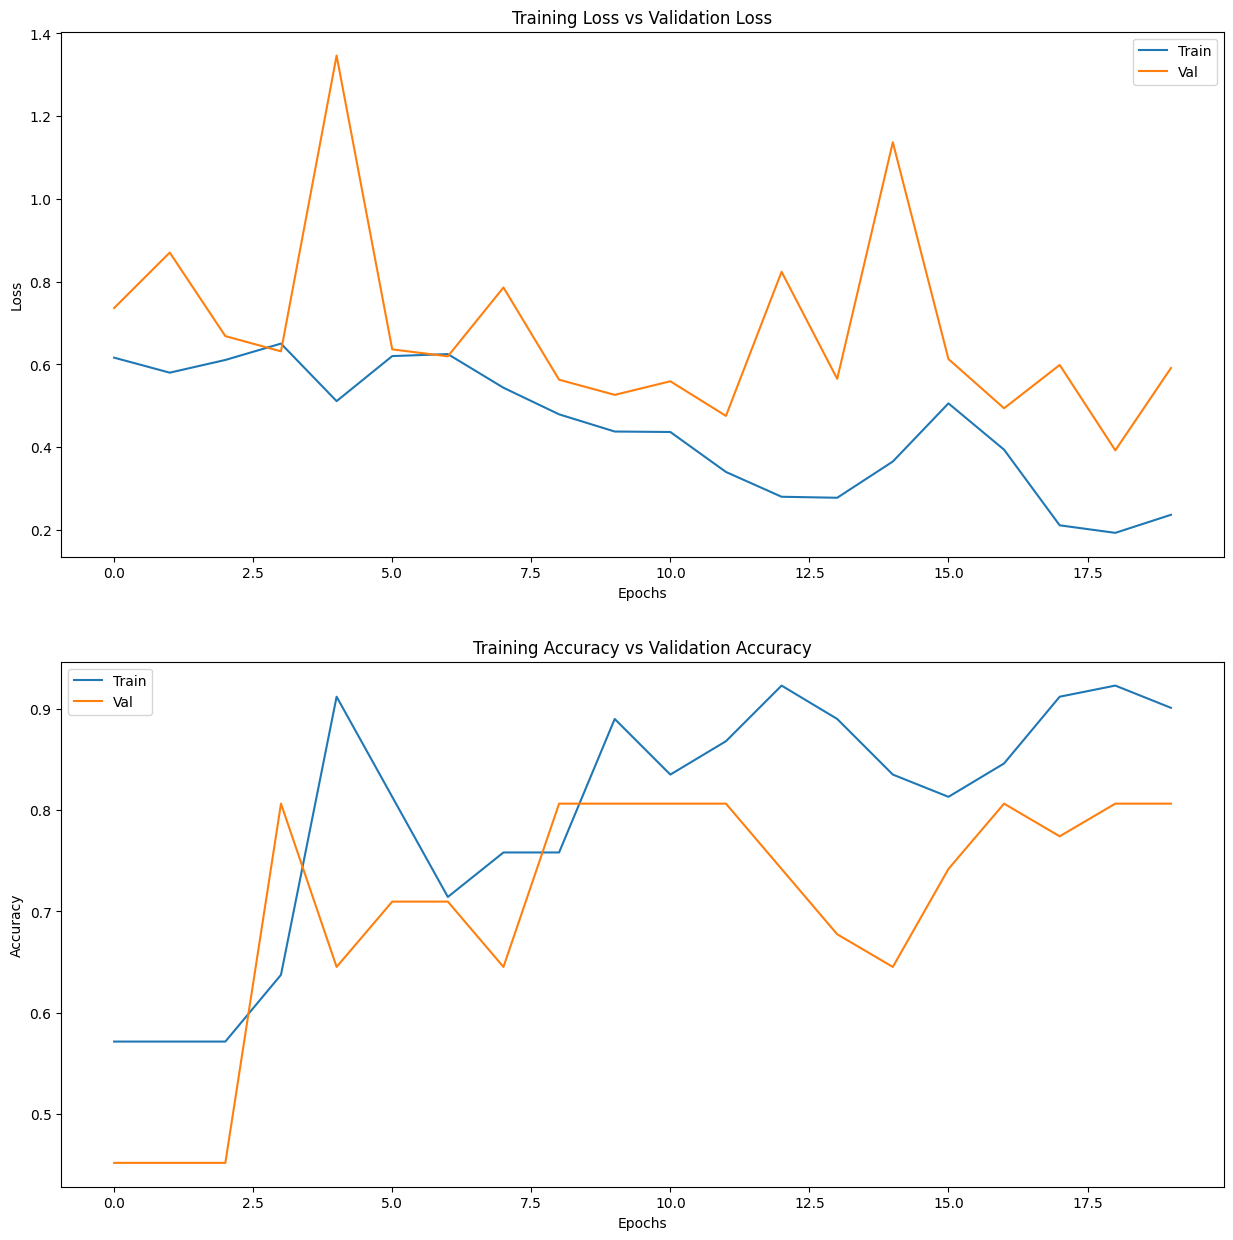

In [45]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train', 'Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])